# Laboratorio #2
___

## Fashion MNIST

`Fashion-MNIST es un dataset de imágenes de artículos de ropa proporcionado por Zalando, creado como un reemplazo moderno del clásico MNIST de dígitos manuscritos. Está compuesto por 70,000 imágenes en escala de grises de 28×28 píxeles, divididas en 60,000 imágenes de entrenamiento y 10,000 de prueba. `

`Cada imagen está asociada con una etiqueta que indica el tipo de prenda, perteneciente a 10 clases:`
- **T-shirt/top** (Calse 0)
- **Trouser** (Calse 1)
- **Pullover** (Calse 2)
- **Dress** (Calse 3)
- **Coat** (Calse 4)
- **Sandal** (Calse 5)
- **Shirt** (Calse 6)
- **Sneaker** (Calse 7)
- **Bag** (Calse 8)
- **Ankle boot** (Calse 9)
___

### Librerias

In [1]:
pip install torch

   ---------------------------------------- 0.0/241.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/241.4 MB 660.6 kB/s eta 0:06:06
   ---------------------------------------- 0.1/241.4 MB 1.1 MB/s eta 0:03:50
   ---------------------------------------- 0.2/241.4 MB 1.6 MB/s eta 0:02:35
   ---------------------------------------- 0.2/241.4 MB 1.4 MB/s eta 0:02:55
   ---------------------------------------- 0.5/241.4 MB 2.5 MB/s eta 0:01:38
   ---------------------------------------- 0.8/241.4 MB 3.4 MB/s eta 0:01:12
   ---------------------------------------- 1.0/241.4 MB 3.8 MB/s eta 0:01:04
   ---------------------------------------- 1.1/241.4 MB 3.6 MB/s eta 0:01:06
   ---------------------------------------- 1.4/241.4 MB 4.0 MB/s eta 0:01:01
   ---------------------------------------- 1.8/241.4 MB 4.5 MB/s eta 0:00:54
   ---------------------------------------- 2.0/241.4 MB 4.5 MB/s eta 0:00:54
   ---------------------------------------- 2.1/241.4 MB 4.5 MB/s eta

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch 
import sklearn

___

### Importar de datos

In [3]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(f'Este data set esta conformado por {X_train.shape[0]} imagenes de {X_train.shape[1]}x{X_train.shape[2]} pixeles de datos de muestra.')
print(f'Los datos de entrenamiento suman {X_test.shape[0]} muestras de {X_test.shape[1]}x{X_test.shape[2]} pixeles igual que el entrenamiento.')
print(f'El target tiene {len(np.unique(y_train))} posibles valores de salida.')

Este data set esta conformado por 60000 imagenes de 28x28 pixeles de datos de muestra.
Los datos de entrenamiento suman 10000 muestras de 28x28 pixeles igual que el entrenamiento.
El target tiene 10 posibles valores de salida.


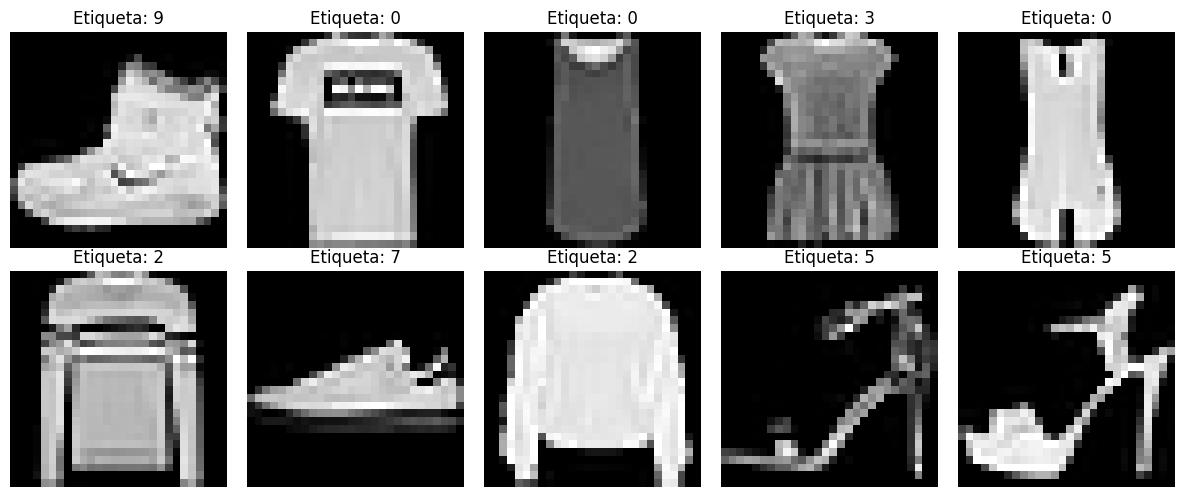

In [10]:
# Ejemplos de las imagenes

fig, axes = plt.subplots(2, 5, figsize=(12, 5))

axes = axes.flatten() 

for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')      
    axes[i].set_title(f"Etiqueta: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()  

## Modelos
___

### Logistic regression

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
# Aplanar los datos a dos dimensiones

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print(f'Numero de dimensiones nueva del train: {X_train_flat.ndim}.')
print(f'Numero de dimensiones nueva del test: {X_test_flat.ndim}.')

Numero de dimensiones nueva del train: 2.
Numero de dimensiones nueva del test: 2.


In [14]:
# Escalar datos
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=100, n_jobs=-1)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

c:\ITESOO\machine_learning\Proyecto1_ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8453

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.74      0.74      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.93      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.90      0.93      0.92      1000
           8       0.95      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



c:\ITESOO\machine_learning\Proyecto1_ML\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [48]:
print("Accuracy de Logistic Regression:", accuracy_score(y_test, y_pred))

Accuracy de Logistic Regression: 0.8453


In [50]:
print("Reporte de Logistic Regression:\n", classification_report(y_test, y_pred))

Reporte de Logistic Regression:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.74      0.74      1000
           3       0.83      0.87      0.85      1000
           4       0.73      0.76      0.74      1000
           5       0.93      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.90      0.93      0.92      1000
           8       0.95      0.94      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



___

# SVM

In [7]:
from sklearn.svm import SVC

In [8]:
svc = SVC(
    C= 1.0, kernel= 'rbf', gamma='auto', max_iter= 10000,
    random_state= 19, 
    )

In [31]:
svc.fit(X_train_scaled, y_train)

SVC(gamma='auto', max_iter=10000, random_state=19)

In [32]:
y_pred = svc.predict(X_test_scaled)

In [39]:
print("Accuracy de SVC:", accuracy_score(y_test, y_pred))

Accuracy de SVC: 0.8836


In [40]:
print("Reporte de SVC:\n", classification_report(y_test, y_pred))

Reporte de SVC:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



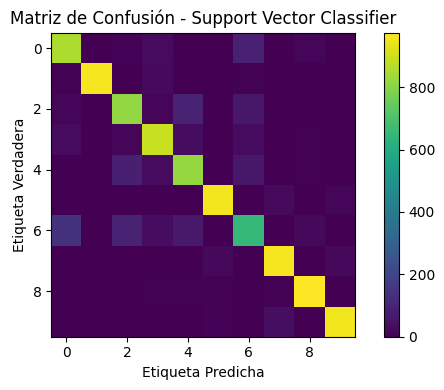

In [37]:
confusion_mtx_svc = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(confusion_mtx_svc)
plt.title('Matriz de Confusión - Support Vector Classifier')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.colorbar()
plt.tight_layout()
plt.show()    

___

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc = RandomForestClassifier(
    criterion= 'entropy', n_estimators=100, 
    random_state= 19 
)

In [43]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', random_state=19)

In [44]:
y_pred = rfc.predict(X_test_scaled)

In [45]:
print("Accuracy de Random Forest:", accuracy_score(y_test, y_pred))

Accuracy de Random Forest: 0.8762


In [46]:
print("Reporte de Random Forest:\n", classification_report(y_test, y_pred))

Reporte de Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



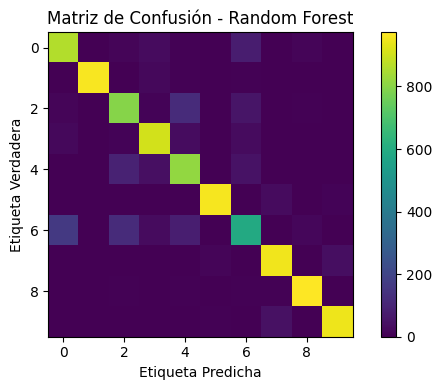

In [47]:
confusion_mtx_rfc = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(confusion_mtx_rfc)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.colorbar()
plt.tight_layout()
plt.show()    

___

# Neural Network (MLP)

___

# Convolutional Neural Network (CNN)